## Observations and Insights 

Oberservations

General:
Study subject distributions is normal with slightly more male study subjects (51%) than female(49%).
The final four drugs (Capomulin, Ramicane, Infubinol, and Ceftamin) have the lowest standard deviation and standard error. 

Conclusions:
There is a very strong positive correlation (.84) between mouse weight and tumor volume.
Infubinol and Cetamin have close tumor volume medians. Infubinal has less quartile variation indicating greater stability. Infubinal also has an obvious outlier with lower tumor volume. 
Capomulin and Ramicane have close tumor volume medians; significantly lower than Infubinal and Cetamin.  Capomul is more slightly more stable than Ramicane.
The final regression test indicates a trend, however the amount of scatter does not allow for a clear determination to be made.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#find common column to base our merge on
MergeData = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
MergeData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
MergeData["Mouse ID"].count()

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#Remove any data (records) associated with that mouse ID. Use the cleaned data in the remaining steps.(next two steps)
MergeData[MergeData.duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
MergeData.loc[MergeData["Mouse ID"]=='g989'].index

Int64Index([107, 137, 329, 360, 620, 681, 815, 869, 950, 1111, 1195, 1380,
            1592],
           dtype='int64')

In [6]:
#current for comparison
MergeData.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [7]:
# Define drop to create a clean DataFrame by dropping the duplicate mouse by its ID.
MergeData = MergeData.drop(MergeData.loc[MergeData["Mouse ID"]== "g989"].index)

In [8]:
#for comparison
MergeData.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [9]:
CleanData_df = MergeData.drop_duplicates()

In [10]:
# Checking the number of mice in the clean DataFrame.
CleanData_df["Mouse ID"].count()

1880

In [11]:
CleanData_df.shape

(1880, 8)

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_df = CleanData_df.groupby(["Drug Regimen"]) 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = regimen_df.mean()["Tumor Volume (mm3)"]
drug_median = regimen_df.median()["Tumor Volume (mm3)"]
drug_variance = regimen_df.var()["Tumor Volume (mm3)"]
drug_dev = regimen_df.std()["Tumor Volume (mm3)"]
drug_SE = regimen_df.sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
Regimen_summary_df = pd.DataFrame({"Mean Tumor Volume": drug_mean,
                                   "Median Tumor Volume": drug_median,
                                   "Tumor Volume Variance": drug_median,
                                   "Tumor Volume Std.Dev.": drug_variance,
                                   "Tumor Volume Std.Err.": drug_SE})

#print(drug_mean) - prints
#print(drug_median) - prints
#print(drug_variance) - prints
#print(drug_dev) - prints
#print (drug_SE)
Regimen_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,52.431737,59.450562,0.573111


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
Regimen_summary2 = CleanData_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
Regimen_summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<ipython-input-14-43f899e6ee09>:7: UserWarning: The handle <BarContainer object of 10 artists> has a label of '_' which cannot be automatically added to the legend.
  plt.legend('_')


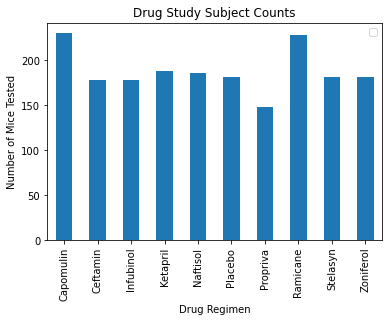

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
Unique_mice = CleanData_df.groupby("Drug Regimen").agg({"Mouse ID":["count"]}).plot.bar()
Unique_mice.set_ylabel("Number of Mice Tested")
plt.title("Drug Study Subject Counts")

# Remove legend
plt.legend('_')

# Save figure to file
plt.savefig("../my_images/subject_count_bar.png")


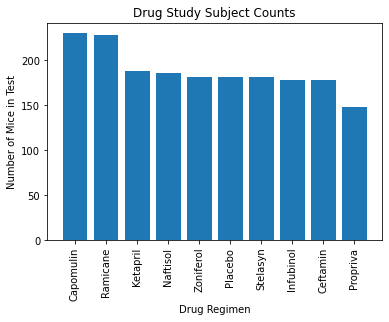

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_subjects = CleanData_df['Drug Regimen'].value_counts()
plt.bar(mice_subjects.index.values,mice_subjects.values)
plt.title("Drug Study Subject Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice in Test")
plt.xticks(rotation=90)
plt.savefig("../my_images/subject_count_PyBar.png")
plt.show()

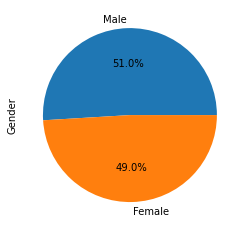

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders1 = CleanData_df["Sex"].value_counts()
plot = genders1.plot.pie(autopct='%1.1f%%')
plt.ylabel("Gender")
plt.savefig("../my_images/gender_PandaPies.png")

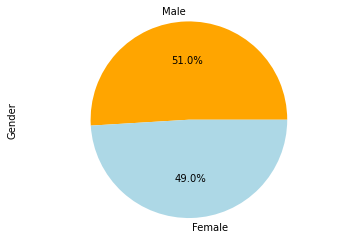

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders2 = CleanData_df["Sex"].value_counts()

# Labels for the sections of our pie chart
labels = ["Male", "Female"]
colors = ["orange", "lightblue"]
plt.ylabel("Gender")

# Create the pie - autopct automatically finds the percentages of each part of the pie chart
plt.pie(genders2, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../my_images/gender_PyPies.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = CleanData_df.groupby(["Mouse ID"])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_timepoint = last_timepoint.merge(CleanData_df,on=['Mouse ID', 'Timepoint'],how="left")


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
four_drugs =  ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers (acrose the 4 regimes)
#use merge_timepoint use loc on drug regimen - blah deleted out earlier .loc

#highlight any potential outliers in the plot by changing their color and style (see hint below).
#color see part 3 wrestlers maybe    
for drug in four_drugs:

# Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merge_timepoint.loc[merge_timepoint["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
        
    # add subset 
    tumor_volume.append(final_tumor_vol)
    #print(tumor_volume) -- yes tumor volumes are there
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

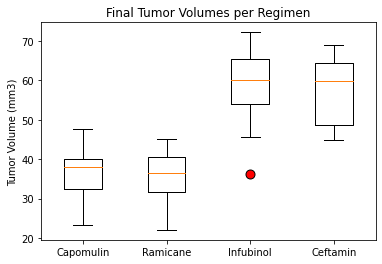

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes per Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
red_dot = dict(markerfacecolor='red', markersize=9)
ax1.boxplot(tumor_volume, labels=four_drugs, flierprops=red_dot)
plt.boxplot
plt.savefig("../my_images/finalVol_Boxplot.png")
plt.show()

## Line and Scatter Plots

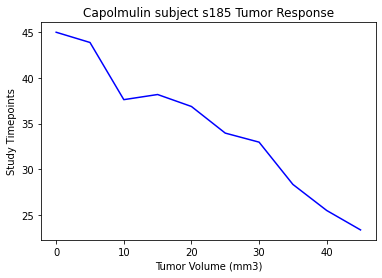

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Isolate data for one mouse
Capomulin_mice = CleanData_df.loc[CleanData_df["Drug Regimen"] =="Capomulin",:]
One_mouse = Capomulin_mice.loc[Capomulin_mice["Mouse ID"]=="s185",:]

# Set x and y values
Time = One_mouse["Timepoint"]
Vol = One_mouse["Tumor Volume (mm3)"]

# Title and axis labels
plt.title("Capolmulin subject s185 Tumor Response")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Study Timepoints")

# Save figure to file
plt.savefig("../my_images/s185_Line.png")

# Plot the world average as a line chart
tumor_time, = plt.plot(Time, Vol, color="blue")

# Show the chart
plt.show()

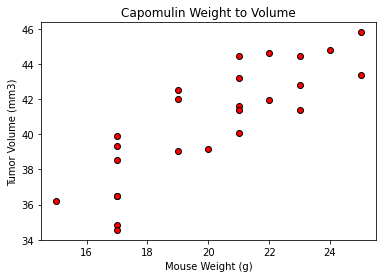

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_mice = CleanData_df.loc[CleanData_df["Drug Regimen"] =="Capomulin",:]
Capomulin_mice = Capomulin_mice.set_index("Mouse ID")
Capomulin_avg = Capomulin_mice.groupby("Mouse ID").mean()

# Generage the scatter plot
plt.scatter(Capomulin_avg["Weight (g)"], Capomulin_avg["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black")
plt.title("Capomulin Weight to Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Save figure to file
plt.savefig("../my_images/Weight_Vol_Scatter.png")

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

cweight = Capomulin_avg["Weight (g)"]

cvol = Capomulin_avg["Tumor Volume (mm3)"]
correlation = st.pearsonr(cweight,cvol)

# Print the correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


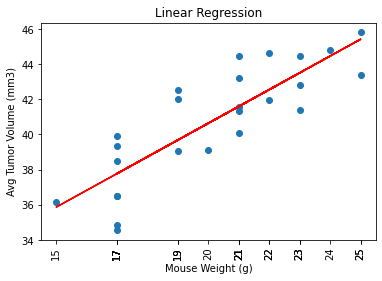

In [27]:
# Perform a linear regression on weight and avg tumor volume
slope, int, r, p, std_err = st.linregress(cweight, cvol)

# Create equation of line to calculate predicted correlation
fit = slope * cweight + int

# Plot the linear regression against actual results
plt.scatter(cweight,cvol)
plt.plot(cweight,fit,"red")
plt.xticks(cweight, rotation=90)
plt.title("Linear Regression")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')

# Save figure to file and print
plt.savefig("../my_images/linear_regression.png")
plt.show()